**Assignment 16: Check fruit quality from an IoT device - 10422030**

**Question:** Your device has classified images, and has the values for the predictions. Your device could use this information to do something - it could sent it to IoT Hub for processing by other systems, or it could control an actuator such as an LED to light up when the fruit is unripe.

Add code to your device to respond in a way of your choosing - either send data to an IoT Hub, control an actuator, or combine the two and send data to an IoT Hub with some serverless code that determines if the fruit is ripe or not and sends back a command to control an actuator.

**Answer:**

- In this assignment, I will use the image captured by the device and up to Google Colab to predict. The model I already trained in the assignment 15, I also use Adafruit to control and sent the information about the predicted image to Adafruit via MQTT to control. Because the some IoT devices are limited so that I just use Colab to do the most important part.

**I. First, we repare and predict the image.**

**Step 1: Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 2: Install the neccessary library**

In [ ]:
!pip install tensorflow paho-mqtt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 4.1 MB/s eta 0:00:00


**Step 3: Create Adafruit Feed to revice and store information.**

We can create 2 feeds "tomato" and "led" to control.

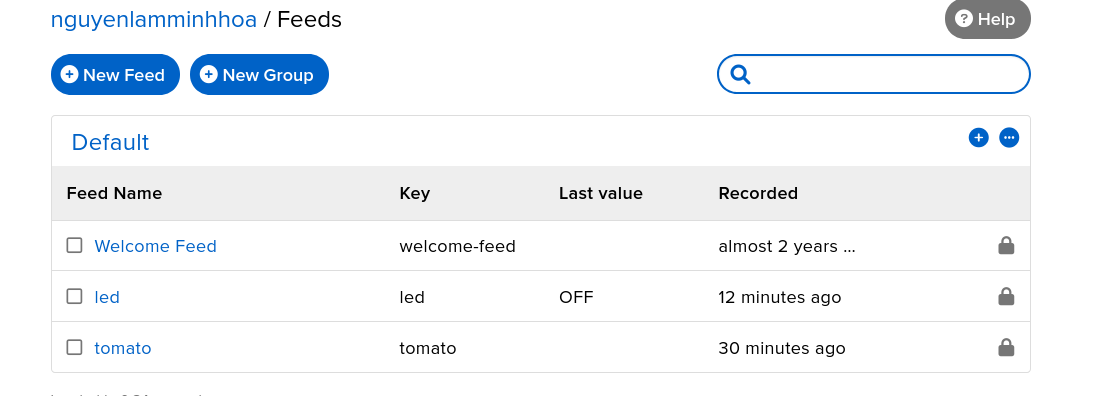

**Step 4: Create Adafruit dashboard**

The dashboard can created to see the overal process, with one feed "led" to show "ON" or "OFF".

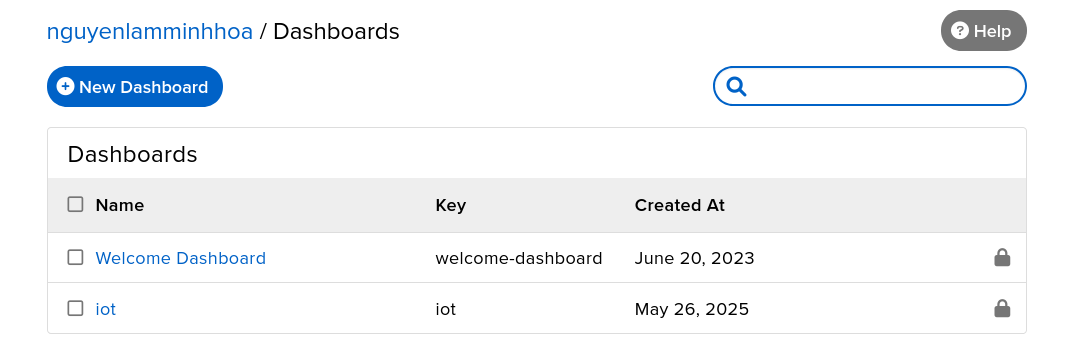

**Step 5: Connect to Adafruit and send the data**

We can connect to Adafruit via username and IO key, the model will be loaded and the image we want to predict also loaded, all the information will be sent to Adafruit with "OFF" for ripe and "ON" for unripe.

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import paho.mqtt.client as mqtt

# Load model from Google Drive
model = load_model('/content/drive/MyDrive/Model_iot/tomato_fruits_trained_model.h5')

# MQTT setup
ADAFRUIT_IO_USERNAME = 'nguyenlamminhhoa'
ADAFRUIT_IO_KEY = ''
MQTT_FEED_LED = f"nguyenlamminhhoa/feeds/led"

client = mqtt.Client(protocol=mqtt.MQTTv311)
client.username_pw_set(ADAFRUIT_IO_USERNAME, ADAFRUIT_IO_KEY)
client.connect("io.adafruit.com", 1883, 60)

# Preprocessing image
def preprocess_image(img_path, target_size=(180, 180)):
    img = Image.open(img_path).resize(target_size)
    img_array = np.array(img) / 255.0  # normalize
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Predict image + publish result
images = ['/content/drive/MyDrive/Model_iot/sample_test/riped_tomato_20.jpeg']

for img_path in images:
    img_array = preprocess_image(img_path)
    pred = model.predict(img_array)

    label_idx = np.argmax(pred)
    label = "unripe" if label_idx == 0 else "ripe"
    confidence = float(np.max(pred))

    print(f"Image: {img_path}")
    print(f"Prediction: {label} (Confidence: {confidence:.2f})")

    # Publish to Adafruit IO
    if label == 'ripe':
        client.publish(MQTT_FEED_LED, "OFF")
        print("→ Published OFF to LED feed (ripe)")
    else:
        client.publish(MQTT_FEED_LED, "ON")
        print("→ Published ON to LED feed (unripe)")

client.disconnect()

<ipython-input-9-4a038fb13d84>:14: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client(protocol=mqtt.MQTTv311)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
Image: /content/drive/MyDrive/Model_iot/sample_test/riped_tomato_20.jpeg
Prediction: ripe (Confidence: 6.07)
→ Published OFF to LED feed (ripe)


<MQTTErrorCode.MQTT_ERR_SUCCESS: 0>

- After run the code, we can see the model can predict the tomato is ripe and put the comment "OFF" to the feed "led" on Adafruit.

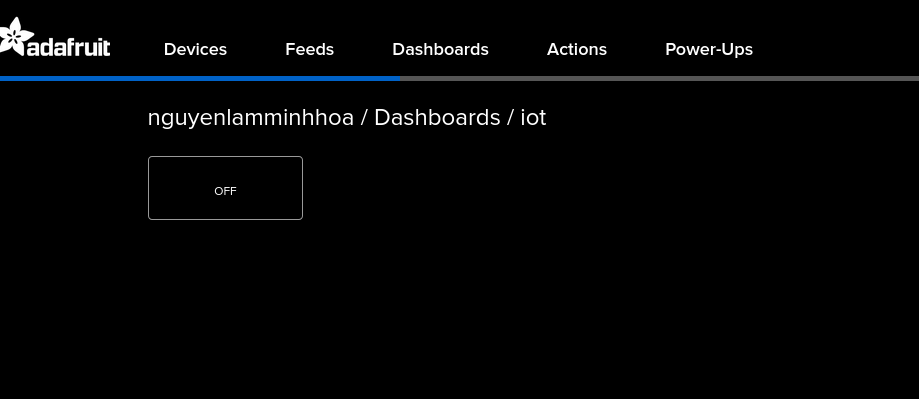

**II. Conclusion**

In this assignment, we successfully built an end-to-end IoT system that classifies images of tomatoes as either ripe or unripe using a pre-trained Keras .h5 model running on Google Colab. Based on the classification results, we connected the system to Adafruit IO via MQTT, publishing control messages to a led feed.

When the model predicts a ripe tomato, the system sends an “OFF” signal to the LED feed; when it predicts an unripe tomato, it sends an “ON” signal. This setup allows real-time interaction between image-based machine learning predictions and IoT actuators (like LEDs) via the cloud.

The system meets the Exemplary rubric by consistently responding to predictions with appropriate control actions, demonstrating a fully integrated AI + IoT pipeline.